![](logo1.jpg)

# shAI Training 2022 | Level 1
## Task #5  (End-to-End ML Project {part_1})
***

### Welcome to the exercises for reviewing first part of end to end ML project.

**Make sure that you read and understand ch2 from the hands-on ML book (page 35 - 71) before start with this notebook.** 

**If you stuck with anything reread that part from the book and feel free to ask about anything in the messenger group as you go along.**

**Good Luck : )**

***
# 1- Get the Data
***

In [2]:
import numpy as np
import pandas as pd

#### We'll work with the housing price in California dataset
#### There're 2 ways to get the data:

## First:
Download and extract the dataset in your local device from

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz

then read it using pandas method read_csv

**Read housing.csv as a dataframe called housing.**

In [3]:
# CODE HERE
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Second:
Write a simple function that gets the dataset directly from the website.

In [4]:
# import needed libraries
import os
import tarfile
import urllib

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


**Use load_housing_data to create dataframe called housing.**

In [6]:
# CODE HERE
def load_housing_data():
    import pandas as pd
    housing = pd.read_csv("housing.csv")
    return housing

In [7]:
housing = load_housing_data()


***
# 2- Discover and visualize the data
***

## A- Data discovery

**Check the head of housing, and check out its info() and describe() methods.**

#### 1-Let’s take a look at the top five rows using the DataFrame’s head() method

In [8]:
# CODE HERE
housing.head(10) # displays the first ten rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### 2-Use the info() method to get a quick description of the data

In [9]:
# CODE HERE
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


#### 3-Let's take a look at how many districts belong to "ocean_proximity" by using the value_counts() method

In [10]:
# CODE HERE
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### 4-Let’s look at the summary of the numerical attributes . Using the describe() method

In [11]:
# CODE HERE
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

## B- Data visualization

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Create a hist plot for housing dataframe as shown down

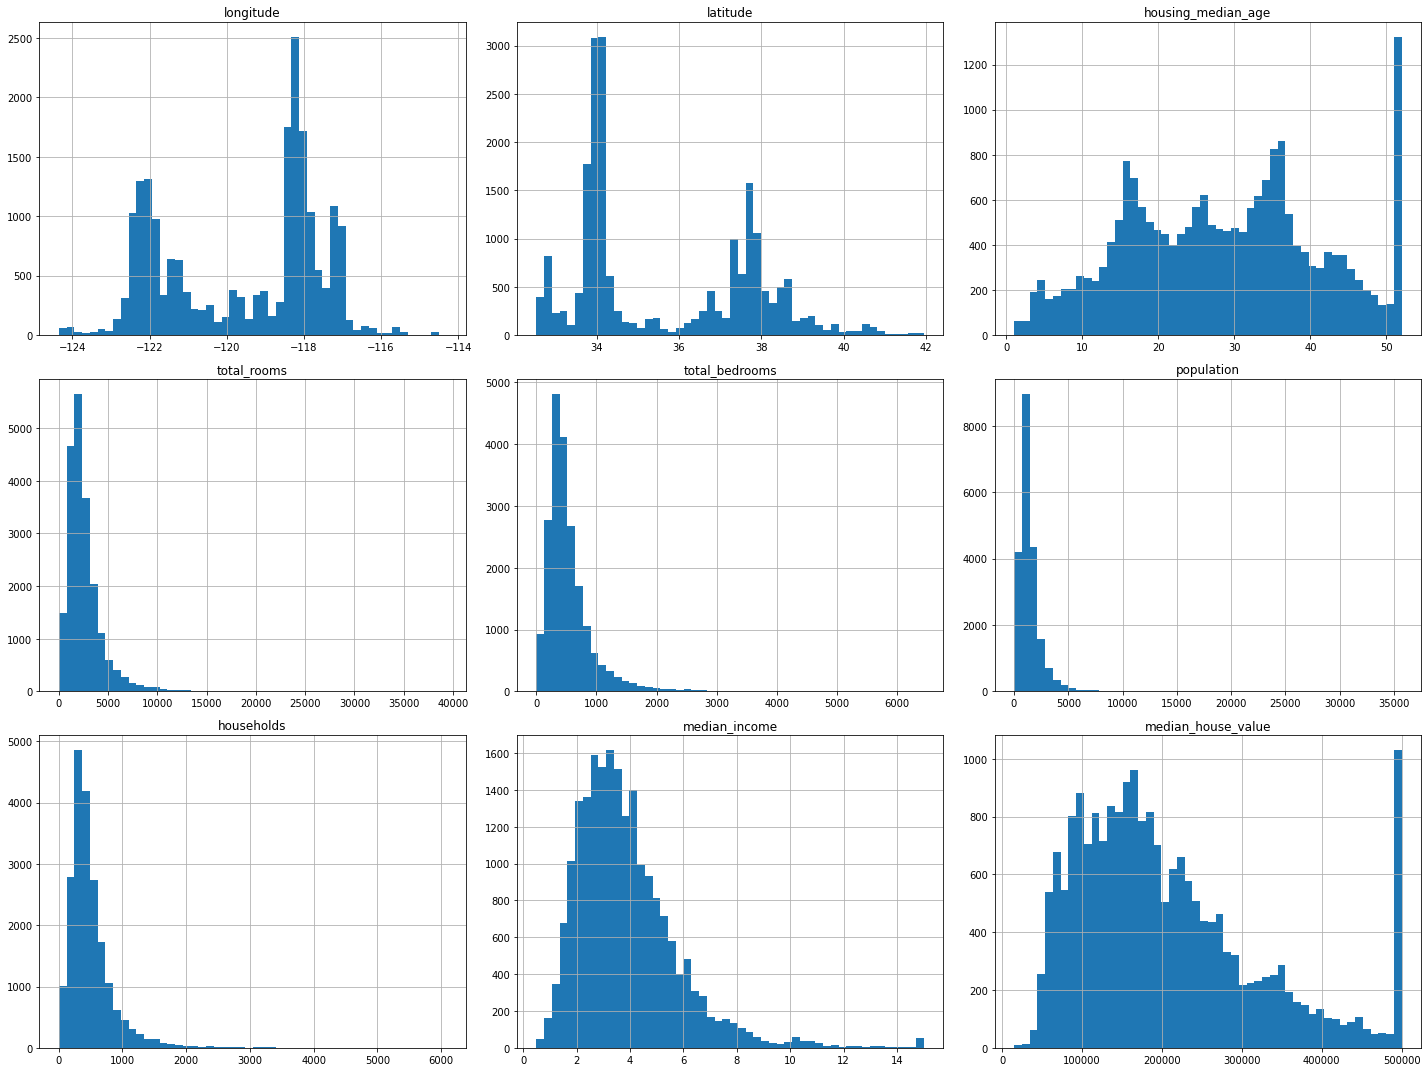

In [13]:
# CODE HERE

# create a figure with 3 rows and 3 columns of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# plot a histogram for each numerical attribute in a separate subplot
housing.hist(bins=50, ax=axs)

# add titles to the subplots
for i, ax in enumerate(axs.flat):
    ax.set_title(housing.columns[i])
    
# adjust the layout of the subplots
plt.tight_layout()

# show the plot
plt.show()


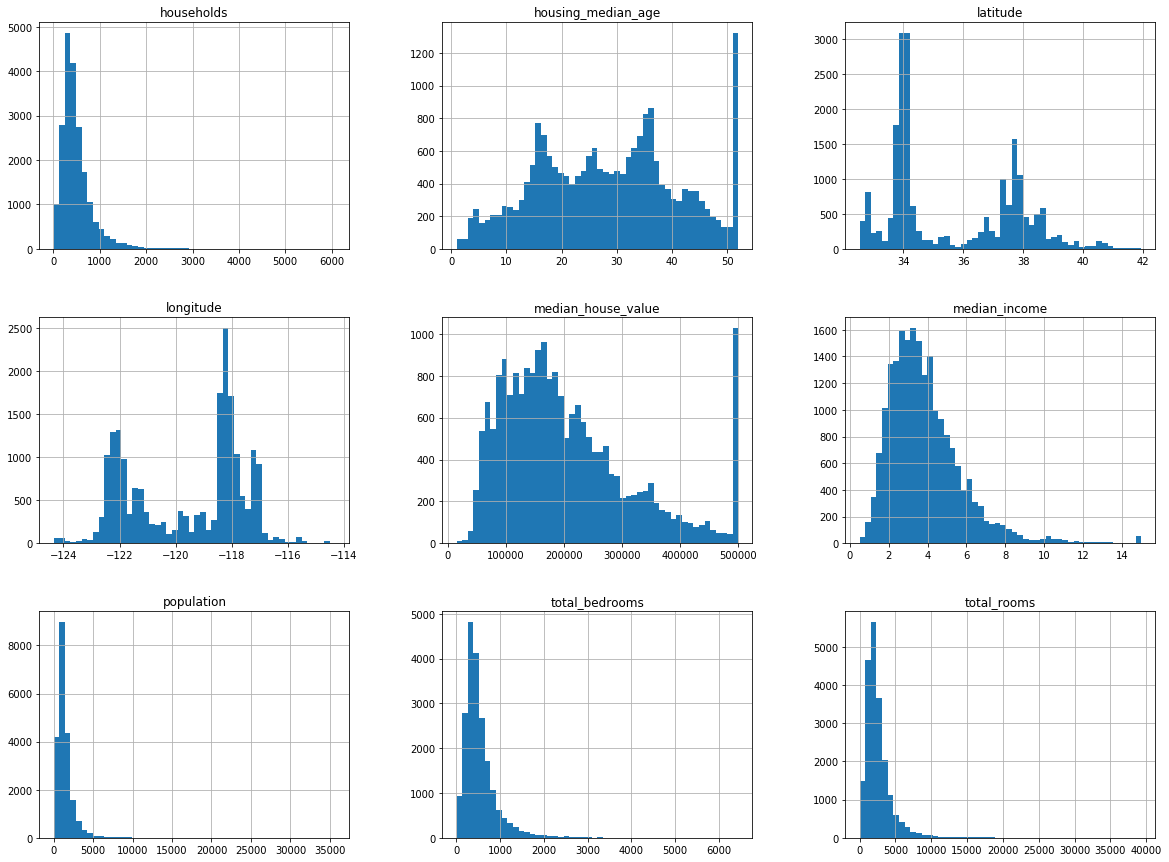

#### Create a scatter plot between "longitude" in x axis and "latitude" in y axis with alpha = 0.1

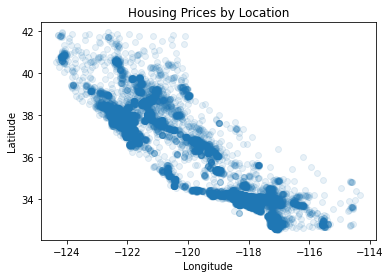

In [14]:
# CODE HERE

# create a scatter plot with longitude on the x-axis and latitude on the y-axis
plt.scatter(x=housing["longitude"], y=housing["latitude"], alpha=0.1)

# add a title and axis labels
plt.title("Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# show the plot
plt.show()


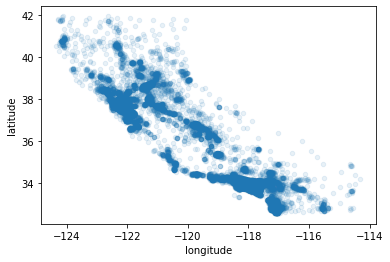

#### Make The radius of each circle represent the district’s population (option s), and the color represents the price (option c).

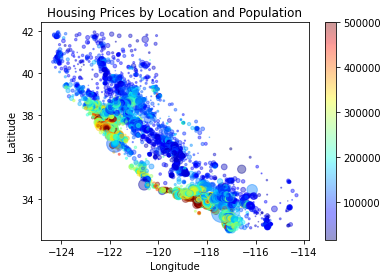

In [15]:
# CODE HERE

# create a scatter plot with longitude on the x-axis, latitude on the y-axis, population as size, and price as color
plt.scatter(x=housing["longitude"], y=housing["latitude"], s=housing["population"]/100, c=housing["median_house_value"], alpha=0.4, cmap="jet")

# add a colorbar legend to the plot
plt.colorbar()

# add a title and axis labels
plt.title("Housing Prices by Location and Population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# show the plot
plt.show()


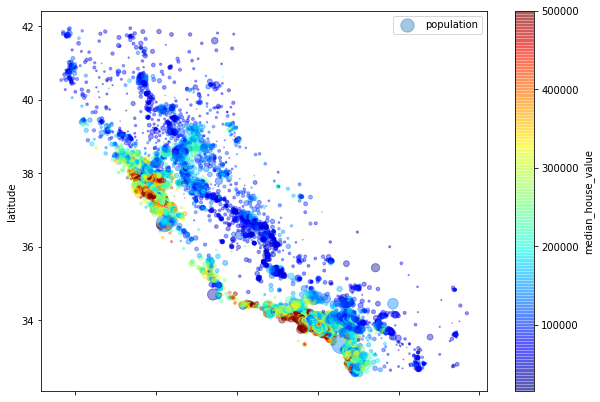

#### Explore correlation between all continuous numeric variables using .corr() method.

In [16]:
# CODE HERE
correlations = housing.corr()
print(correlations)



                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_12745/1652107098.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


#### Use seaborn method to convert the correlation matrix to a heatmap plot
#### It's usually a better way to look for correlations among the features

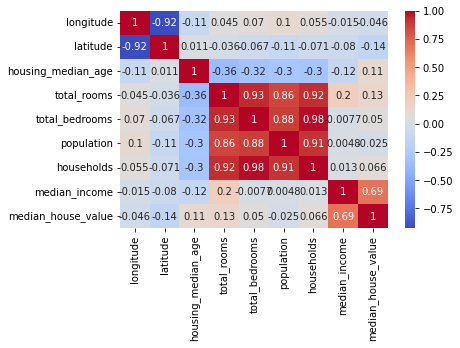

In [17]:
# CODE HERE
# create a heatmap of the correlation matrix
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# show the plot
plt.show()

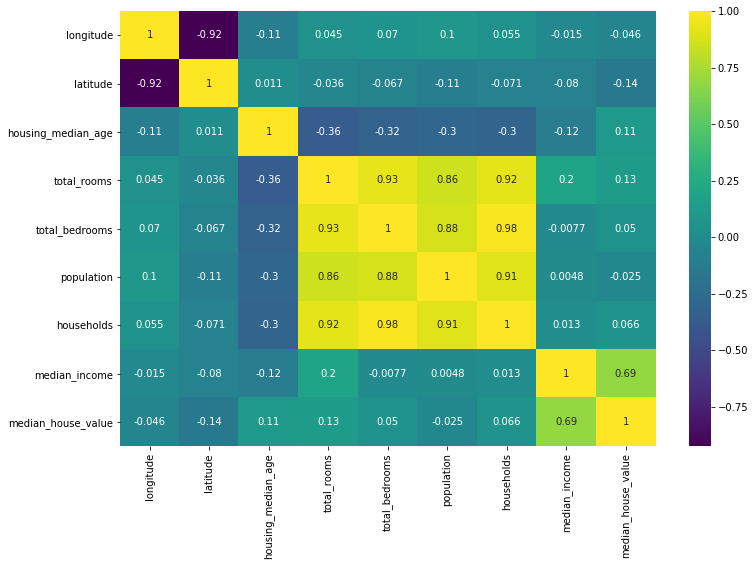

#### Another way to check for correlation between attributes is to use the pandas scatter_matrix() function

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

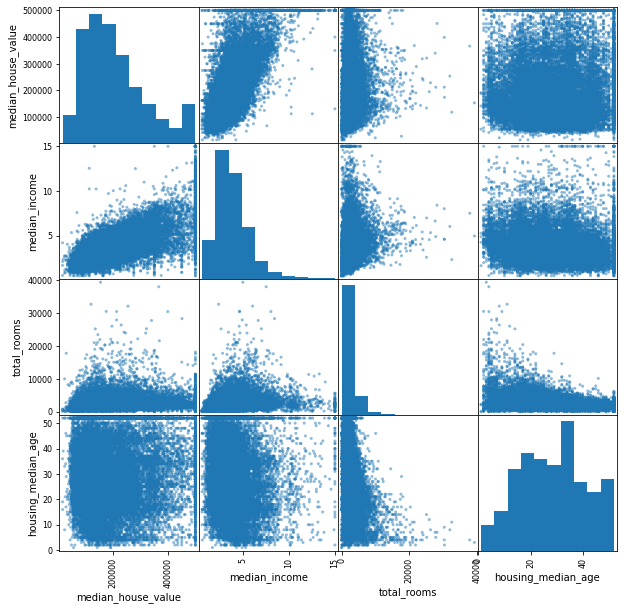

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# CODE HERE
# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Use scatter_matrix() to create the scatter plot matrix
scatter_matrix(selected_data, figsize=(10, 10))

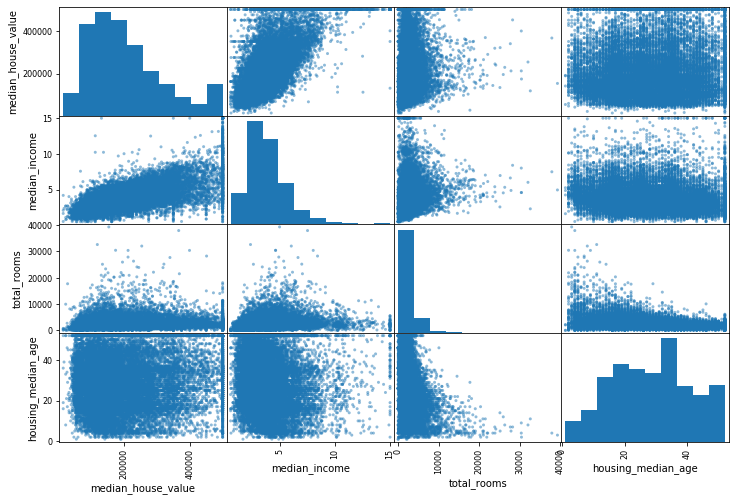

#### *CHALLENGE*
#### change the color of the plot based on ocean_proximity category
#### hint: use seaborn pairplot

In [27]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "ocean_proximity"]

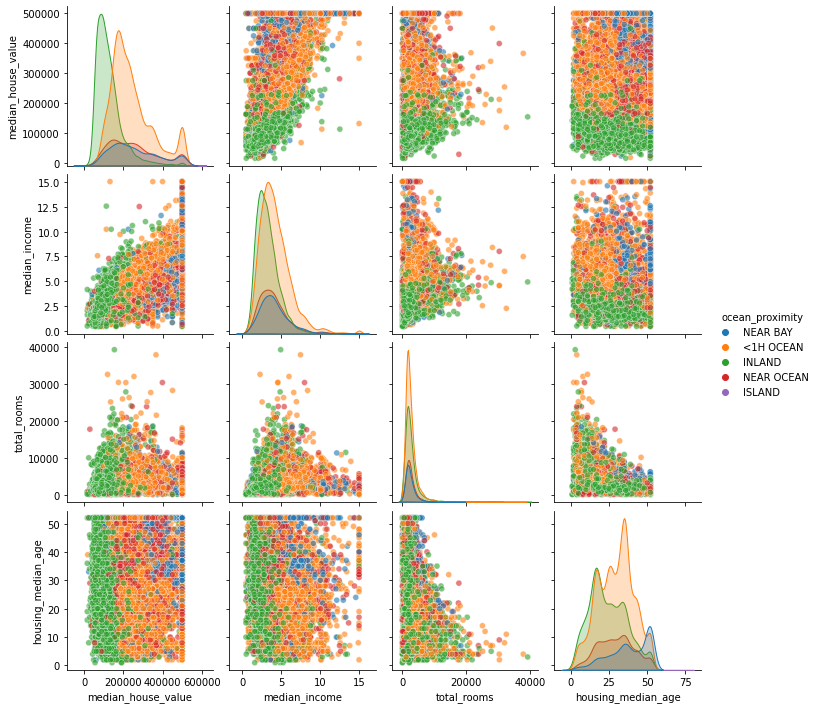

In [29]:
# CODE HERE
# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Use seaborn pairplot() to create the scatter plot matrix
sns.pairplot(selected_data, hue='ocean_proximity', plot_kws={'alpha':0.6})

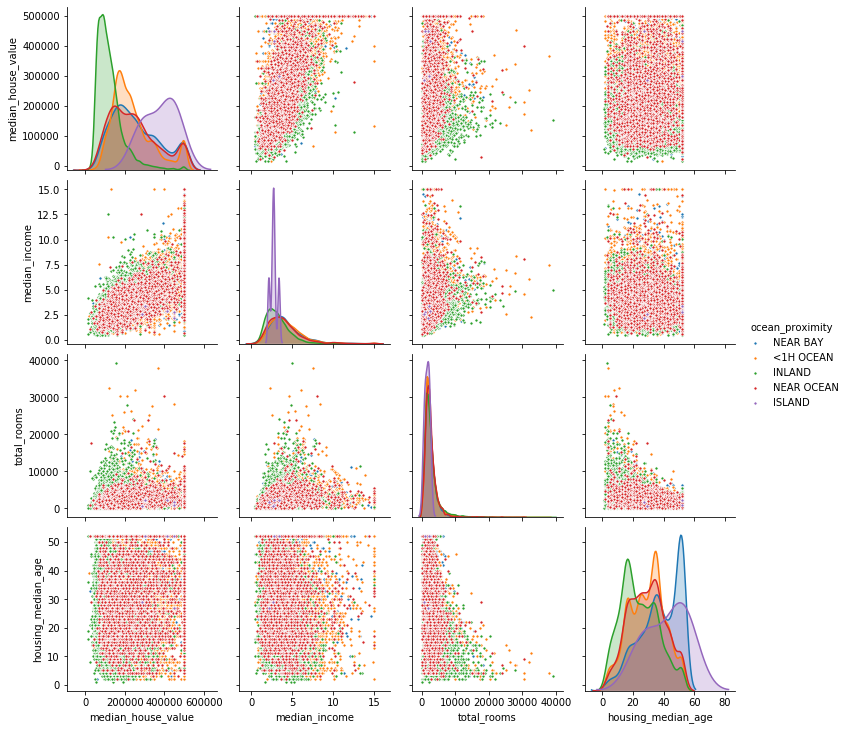

#### Create a scatter plot between median_income and median_house_value

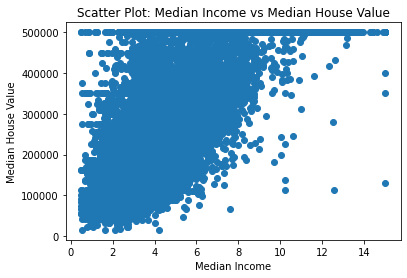

In [32]:
# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Create the scatter plot
plt.scatter(selected_data["median_income"], selected_data["median_house_value"])

# Set plot labels
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter Plot: Median Income vs Median House Value")

# Display the plot
plt.show()

#### Create a boxplot to show the relation between median_house_value and the categorical feature ocean_proximity

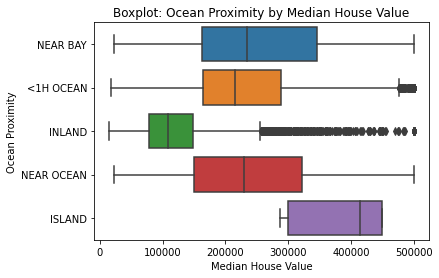

In [37]:
# CODE HERE

# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Create the horizontal boxplot
sns.boxplot(x="median_house_value", y="ocean_proximity", data=selected_data)

# Set plot labels
plt.xlabel("Median House Value")
plt.ylabel("Ocean Proximity")
plt.title("Boxplot: Ocean Proximity by Median House Value")

# Display the plot
plt.show()

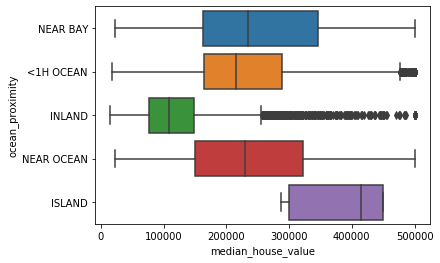

***
# 3- Prepare the data
***

## A- Data Cleaning

#### Create a Series that displays the total count of missing values per column.

In [38]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### the total_bedrooms attribute has some missing values. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:

#### Use the third option and fill the total_bedrooms null values with the median

In [44]:
# CODE HERE
# Assuming you have a DataFrame called 'data' containing the attributes
attributes = ["total_bedrooms"]
# Drop rows with missing values in 'total_bedrooms'
data_without_missing = df.dropna(subset=['total_bedrooms'])
# Drop the 'total_bedrooms' attribute
data_without_total_bedrooms = df.drop('total_bedrooms', axis=1)
# Fill the missing values with the median
median_value = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_value, inplace=True)
selected_data["total_bedrooms"].fillna(median_value, inplace=True)

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_12745/3594560369.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["total_bedrooms"].fillna(median_value, inplace=True)


#### Check if there any zeros in dataframe.

In [45]:
(housing == 0).sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Great there aren't any zeros in the data.
#### Zeros may sometimes be missing values so we need to take a closer look at them

## B- Attribute Combinations

#### create new attribute called rooms_per_household between total_rooms and households

In [50]:
# CODE HERE
attributes = ["total_rooms", "households"]

# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Create the new attribute 'rooms_per_household'
selected_data['rooms_per_household'] = selected_data['total_rooms'] / selected_data['households']

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_12745/431294472.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['rooms_per_household'] = selected_data['total_rooms'] / selected_data['households']


#### create new attribute called bedrooms_per_room between total_bedrooms and total_rooms

In [56]:
# CODE HERE
attributes = ["total_rooms", "total_bedrooms"]
# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Create the new attribute 'bedrooms_per_room'
selected_data['bedrooms_per_room'] = selected_data['total_bedrooms'] / selected_data['total_rooms']

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_12745/3593471004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bedrooms_per_room'] = selected_data['total_bedrooms'] / selected_data['total_rooms']


#### create new attribute called population_per_household between population and households

In [60]:
# CODE HERE

# Assuming you have a DataFrame called 'data' containing the attributes
attributes = ["population", "households"]

# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Create the new attribute 'population_per_household'
selected_data['population_per_household'] = selected_data['population'] / selected_data['households']

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_12745/247687379.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['population_per_household'] = selected_data['population'] / selected_data['households']


#### Now let's look for correlation again

In [63]:
# CODE HERE
# Assuming you have a DataFrame called 'data' containing the attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "population", "households"]

# Create a DataFrame with the selected attributes
selected_data = df[attributes]

# Create the 'population_per_household' attribute
selected_data['population_per_household'] = selected_data['population'] / selected_data['households']

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                          median_house_value  median_income  total_rooms  \
median_house_value                  1.000000       0.688075     0.134153   
median_income                       0.688075       1.000000     0.198050   
total_rooms                         0.134153       0.198050     1.000000   
housing_median_age                  0.105623      -0.119034    -0.361262   
population                         -0.024650       0.004834     0.857126   
households                          0.065843       0.013033     0.918484   
population_per_household           -0.023737       0.018766    -0.024581   

                          housing_median_age  population  households  \
median_house_value                  0.105623   -0.024650    0.065843   
median_income                      -0.119034    0.004834    0.013033   
total_rooms                        -0.361262    0.857126    0.918484   
housing_median_age                  1.000000   -0.296244   -0.302916   
population                     

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_12745/4152675018.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['population_per_household'] = selected_data['population'] / selected_data['households']


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

#### now let's remove old features("total_bedrooms", "total_rooms", "population", "households"), use drop method
#### Note: make inplace parameter True to save changes

In [64]:
# CODE HERE
# Assuming you have a DataFrame called 'data' containing the attributes

# List of columns to drop
columns_to_drop = ["total_bedrooms", "total_rooms", "population", "households"]

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)


## C- Handling Text and Categorical Attributes

#### We have 5 classes in ocean_proximity.
#### To handle this categorical feature we create housing_cat that contain ocean_proximity.

In [65]:
print(housing["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [69]:
df['housing_cat'] = df['ocean_proximity'].copy()
# housing_cat = housing[["ocean_proximity",'']]



#### Now use sklearn OneHotEncoder to fit and transform housing_cat.

In [70]:
from sklearn.preprocessing import OneHotEncoder
# CODE HERE

In [71]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Reshape the 'housing_cat' attribute to a 2D array
housing_cat_2d = df['housing_cat'].values.reshape(-1, 1)

# Fit and transform the 'housing_cat' attribute using OneHotEncoder
encoded_data = encoder.fit_transform(housing_cat_2d)

# Print the encoded data
print(encoded_data)

  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 3)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (20615, 1)	1.0
  (20616, 1)	1.0
  (20617, 1)	1.0
  (20618, 1)	1.0
  (20619, 1)	1.0
  (20620, 1)	1.0
  (20621, 1)	1.0
  (20622, 1)	1.0
  (20623, 1)	1.0
  (20624, 1)	1.0
  (20625, 1)	1.0
  (20626, 1)	1.0
  (20627, 1)	1.0
  (20628, 1)	1.0
  (20629, 1)	1.0
  (20630, 1)	1.0
  (20631, 1)	1.0
  (20632, 1)	1.0
  (20633, 1)	1.0
  (20634, 1)	1.0
  (20635, 1)	1.0
  (20636, 1)	1.0
  (20637, 1)	1.0
  (20638, 1)	1.0
  (20639, 1)	1.0


## D- Feature Scaling

#### To scale numerical values we created housing_num that contain numerical values. 
#### Now use sklearn StandardScaler to fit and transform housing_num.

In [78]:
from sklearn.preprocessing import StandardScaler
housing_num = housing.drop("ocean_proximity", axis=1)

# CODE HERE


# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical attributes using StandardScaler
scaled_data = scaler.fit_transform(housing_num)

# Print the scaled data
print(scaled_data)

[[-1.32783522  1.05254828  0.98214266 ... -0.97703285  2.34476576
   2.12963148]
 [-1.32284391  1.04318455 -0.60701891 ...  1.66996103  2.33223796
   1.31415614]
 [-1.33282653  1.03850269  1.85618152 ... -0.84363692  1.7826994
   1.25869341]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.17404163 -1.14259331
  -0.99274649]
 [-0.87362627  1.77823747 -0.84539315 ... -0.39375258 -1.05458292
  -1.05860847]
 [-0.83369581  1.75014627 -1.00430931 ...  0.07967221 -0.78012947
  -1.01787803]]


array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

# Custom Transformers


####  Here is a small transformer class that adds the combined attributes wediscussed earlier:

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

#### Use the above class (CombinedAttributesAdder) to create instance called attr_reader, then transform housing values and save them in a variable called housing_extra_attribs.

In [ ]:
# CODE HERE

In [ ]:
print(housing_extra_attribs)

[[-122.23 37.88 41.0 ... 'NEAR BAY' 6.984126984126984 2.5555555555555554]
 [-122.22 37.86 21.0 ... 'NEAR BAY' 6.238137082601054 2.109841827768014]
 [-122.24 37.85 52.0 ... 'NEAR BAY' 8.288135593220339 2.8022598870056497]
 ...
 [-121.22 39.43 17.0 ... 'INLAND' 5.20554272517321 2.325635103926097]
 [-121.32 39.43 18.0 ... 'INLAND' 5.329512893982808 2.1232091690544412]
 [-121.24 39.37 16.0 ... 'INLAND' 5.254716981132075 2.616981132075472]]


# Transformation Pipelines


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Create your own pipline for numerical attributes. It should contain SimpleImputer, CombinedAttributesAdder, and StandardScaler. call it num_pipeline.

In [81]:
# CODE HERE

# Create an instance of CombinedAttributesAdder
attr_reader = CombinedAttributesAdder()

# Transform the housing values using the attr_reader instance
housing_extra_attribs = attr_reader.transform(housing.values)


#### now create a full pipeline called full_pipeline , use num_pipeline for numerical attributes  and OneHotEncoder for catigorcal attributes .

In [82]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [85]:
# CODE HERE
# Create a pipeline for numerical attributes
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create a pipeline for categorical attributes
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Combine the numerical and categorical pipelines using ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])
transformed_data = full_pipeline.fit_transform(housing)


#### fit and transform full_pipeline with housing data then saved it in housing_prepared

In [86]:
# CODE HERE
housing_prepared = full_pipeline.fit_transform(housing)


In [87]:
print(housing_prepared[:5])

[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97032521 -0.9744286
  -0.97703285  2.34476576  2.12963148  0.          0.          0.
   1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.34827594  0.86143887
   1.66996103  2.33223796  1.31415614  0.          0.          0.
   1.          0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82556097 -0.82077735
  -0.84363692  1.7826994   1.25869341  0.          0.          0.
   1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71876767 -0.76602806
  -0.73378144  0.93296751  1.16510007  0.          0.          0.
   1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61197437 -0.75984669
  -0.62915718 -0.012881    1.17289952  0.          0.          0.
   1.          0.        ]]


# 4- Create a Test Set and Train Set

#### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
#### Note: Set random_state=42 to get the same result

In [90]:
# CODE HERE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test = train_test_split(housing_prepared, test_size=0.2, random_state=42)


#### Let’s also separate the predictors and the labels to housing and housing_labels
#### (note that drop() creates a copy of the data and does not affect strat_train_set):

In [93]:
# CODE HERE



# Great Job!
# #shAI_Club